<a href="https://colab.research.google.com/github/Thahraf/project-based-learning/blob/master/img_skip_conxn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Predicted Label: wig


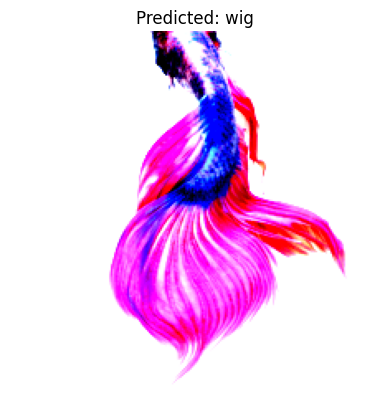

In [5]:
import torch
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt

# Load the pre-trained ResNet model with skip connections
model = models.resnet50(pretrained=True)
model.eval()  # Set the model to evaluation mode

# Image preprocessing pipeline (resize, normalize, etc.)
transform = transforms.Compose([
    transforms.Resize(256),  # Resize image to 256x256 pixels
    transforms.CenterCrop(224),  # Crop the center 224x224 part
    transforms.ToTensor(),  # Convert image to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize
])

# Load an image from file
def classify_image(image_path):
    image = Image.open(image_path)
    image = transform(image).unsqueeze(0)  # Add batch dimension

    # Perform inference
    with torch.no_grad():  # Disable gradient calculation for inference
        outputs = model(image)

    # Get predicted class index
    _, predicted_idx = torch.max(outputs, 1)

    # Load the class labels from ImageNet (used in ResNet pre-trained models)
    # ImageNet has 1000 classes, and we can map the index to a human-readable label
    LABELS_URL = "https://storage.googleapis.com/download.tensorflow.org/data/imagenet_class_index.json"
    import requests
    labels = requests.get(LABELS_URL).json()

    # Get the predicted class label
    predicted_label = labels[str(predicted_idx.item())][1]

    # Print the result
    print(f"Predicted Label: {predicted_label}")

    # Display the image with the predicted label
    plt.imshow(image.squeeze().permute(1, 2, 0))
    plt.title(f"Predicted: {predicted_label}")
    plt.axis("off")  # Hide axes
    plt.show()

# Example Usage:
image_path = '/content/pexels-chevanon-325045.jpg'
classify_image(image_path)